# Deviation of development between groups of embryos

# Table of Contents
* [General](#first-bullet)
* [Load paths](#second-bullet)
* [Load model](#third-bullet)
* [Calculate embeddings](#fourth-bullet)
* [(Optional) Save embeddings](#fifth-bullet)
* [Calculate similarities](#sixth-bullet)
* [(Optional) Save similarities](#sixth-bullet)
* [Overview of plot parameters ](#seventh-bullet)
* [Plot similarities of batch comparisons with batch of untreated embryos ](#eigth-bullet)
* [Plot similarities of all comparisons as individual curves ](#ninth-bullet)

## General <a class="anchor" id="first-bullet"></a>

General imports and class definitions

In [1]:
%load_ext autoreload
%autoreload 2

Load paths from config file

In [2]:
from twinnet_tools.tnconfig import ProjectConfig

config = ProjectConfig("twinnet_config")

ProjectConfig: /root/capsule/code/Scripts/twinnet_config/Linux/config.json


In [3]:
dir_root_scripts = config.json["dir_scripts"]
path_model_zebrafish = config.json["dir_model_zebrafish_more_data"]

config_paths_script = config.json["Deviation_development_inhibitor_detection"]
dir_data = config_paths_script["dir_data_src"]
path_dst = config_paths_script["dir_data_dst"]

Import Python packages

In [4]:
import glob
import matplotlib as mpl
import pandas as pd
import sys

sys.path.append(dir_root_scripts)
from twinnet_tools.tngeneral import TNToolsGeneral
from twinnet_tools.tnbatchcomparison import TNToolsBatchComparison
from twinnet_tools.tninference import TNToolsEmbeddings
from twinnet_tools.tninference import TNToolsSimilarities
from twinnet_tools.tnmodel import TNToolsNetwork
from twinnet_tools.tnplot import TNToolsPlot
from twinnet_tools.tnplotcompare import TNToolsPlotCompare

from pathlib import Path

Prepare class instances

In [5]:
tools_general = TNToolsGeneral()
tools_embeddings = TNToolsEmbeddings(size_img=224, size_img_min=300)
tools_model = TNToolsNetwork()
tools_similarities = TNToolsSimilarities()
tools_plot = TNToolsPlot()
tools_plot_compare = TNToolsPlotCompare()
tools_batchcomparison = TNToolsBatchComparison()

Adjust matplotlib parameters to save plots as .svg files.

In [6]:
new_rc_params = {'text.usetex': False,
                'svg.fonttype': 'none'}
mpl.rcParams.update(new_rc_params)

## Load paths <a class="anchor" id="second-bullet"></a>

Load test data paths

In [7]:
dir_segments_bmp = f"{dir_data}/segments_BMP/-C001--PO01/"
dir_segments_nodal = f"{dir_data}/segments_nodal/C002/"
dir_segments_wt = f"{dir_data}/segments_WT/-B002--PO01/"

Specifiy directory to save output files to

In [8]:
dir_dst_embeddings = f"{path_dst}/embeddings/"

dir_dst_embeddings_path = Path( dir_dst_embeddings )
dir_dst_embeddings_path.mkdir(parents=True, exist_ok=True)

dir_dst_plots = f"{path_dst}/plots/"

dir_dst_plots_path = Path( dir_dst_plots )
dir_dst_plots_path.mkdir(parents=True, exist_ok=True)

Specify path to embedding model

## Load model <a class="anchor" id="third-bullet"></a>

In [9]:
tn_model_embedding = tools_model.tn_embedding_load(path_model_zebrafish)

2023-05-09 14:54:47.258131: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-09 14:54:47.299339: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-09 14:54:47.302536: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-09 14:54:47.305537: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

## Calculate embeddings <a class="anchor" id="fourth-bullet"></a>

In [10]:
embeddings_bmp = tools_batchcomparison.dirs_objects_to_embeddings(dir_segments_bmp, tn_model_embedding)

[LOADING][E000] Embeddings for objects 01/11


2023-05-09 14:55:04.312715: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100


[DONE][Embeddings] 0036/0036                      
[LOADING][E001] Embeddings for objects 02/11
[DONE][Embeddings] 0036/0036                      
[LOADING][E002] Embeddings for objects 03/11
[DONE][Embeddings] 0036/0036                      
[LOADING][E003] Embeddings for objects 04/11
[DONE][Embeddings] 0036/0036                      
[LOADING][E004] Embeddings for objects 05/11
[DONE][Embeddings] 0036/0036                      
[LOADING][E005] Embeddings for objects 06/11
[DONE][Embeddings] 0036/0036                      
[LOADING][E006] Embeddings for objects 07/11
[DONE][Embeddings] 0036/0036                      
[LOADING][E007] Embeddings for objects 08/11
[DONE][Embeddings] 0017/0017                      
[LOADING][E008] Embeddings for objects 09/11
[DONE][Embeddings] 0036/0036                      
[LOADING][E009] Embeddings for objects 10/11
[DONE][Embeddings] 0036/0036                      
[LOADING][E010] Embeddings for objects 11/11
[DONE][Embeddings] 0020/0020            

In [11]:
embeddings_nodal = tools_batchcomparison.dirs_objects_to_embeddings(dir_segments_nodal, tn_model_embedding)

[LOADING][E000] Embeddings for objects 01/10
[DONE][Embeddings] 0036/0036                      
[LOADING][E001] Embeddings for objects 02/10
[DONE][Embeddings] 0036/0036                      
[LOADING][E002] Embeddings for objects 03/10
[DONE][Embeddings] 0036/0036                      
[LOADING][E003] Embeddings for objects 04/10
[DONE][Embeddings] 0036/0036                      
[LOADING][E004] Embeddings for objects 05/10
[DONE][Embeddings] 0036/0036                      
[LOADING][E005] Embeddings for objects 06/10
[DONE][Embeddings] 0036/0036                      
[LOADING][E006] Embeddings for objects 07/10
[DONE][Embeddings] 0036/0036                      
[LOADING][E007] Embeddings for objects 08/10
[DONE][Embeddings] 0036/0036                      
[LOADING][E008] Embeddings for objects 09/10
[DONE][Embeddings] 0036/0036                      
[LOADING][E009] Embeddings for objects 10/10
[DONE][Embeddings] 0036/0036                      
[DONE] Embeddings for timepoint 10/10   

In [12]:
embeddings_wt = tools_batchcomparison.dirs_objects_to_embeddings(dir_segments_wt, tn_model_embedding)

[LOADING][E000] Embeddings for objects 01/15
[DONE][Embeddings] 0036/0036                      
[LOADING][E001] Embeddings for objects 02/15
[DONE][Embeddings] 0036/0036                      
[LOADING][E002] Embeddings for objects 03/15
[DONE][Embeddings] 0036/0036                      
[LOADING][E003] Embeddings for objects 04/15
[DONE][Embeddings] 0036/0036                      
[LOADING][E004] Embeddings for objects 05/15
[DONE][Embeddings] 0036/0036                      
[LOADING][E005] Embeddings for objects 06/15
[DONE][Embeddings] 0036/0036                      
[LOADING][E006] Embeddings for objects 07/15
[DONE][Embeddings] 0036/0036                      
[LOADING][E007] Embeddings for objects 08/15
[DONE][Embeddings] 0036/0036                      
[LOADING][E008] Embeddings for objects 09/15
[DONE][Embeddings] 0036/0036                      
[LOADING][E009] Embeddings for objects 10/15
[DONE][Embeddings] 0036/0036                      
[LOADING][E010] Embeddings for objects 1

## (Optional) Save embeddings <a class="anchor" id="fifth-bullet"></a>

Save embeddings

In [13]:
e1_path = Path( f"{dir_dst_embeddings}/embeddings_BMP/")
e1_path.mkdir(parents=True, exist_ok=True)

tools_batchcomparison.fn_batch_embeddings_npy_save(embeddings_bmp,
                                           f"{dir_dst_embeddings}/embeddings_BMP/")

In [14]:
e2_path = Path( f"{dir_dst_embeddings}/embeddings_nodal/")
e2_path.mkdir(parents=True, exist_ok=True)

tools_batchcomparison.fn_batch_embeddings_npy_save(embeddings_nodal,
                                           f"{dir_dst_embeddings}/embeddings_nodal/")

In [15]:
e3_path = Path( f"{dir_dst_embeddings}/embeddings_WT/")
e3_path.mkdir(parents=True, exist_ok=True)

tools_batchcomparison.fn_batch_embeddings_npy_save(embeddings_wt,
                                           f"{dir_dst_embeddings}/embeddings_WT/")

Load embeddings

In [16]:
embeddings_bmp = tools_batchcomparison.fn_batch_embeddings_npy_load(f"{dir_dst_embeddings}/embeddings_BMP/")

In [17]:
embeddings_nodal = tools_batchcomparison.fn_batch_embeddings_npy_load(f"{dir_dst_embeddings}/embeddings_nodal/")

In [18]:
embeddings_wt = tools_batchcomparison.fn_batch_embeddings_npy_load(f"{dir_dst_embeddings}/embeddings_WT/")

Sort embeddings

In [19]:
embeddings_bmp = {k: v for k, v in sorted(embeddings_bmp.items(), key=lambda item: item[0])}

In [20]:
embeddings_nodal = {k: v for k, v in sorted(embeddings_nodal.items(), key=lambda item: item[0])}

In [21]:
embeddings_wt = {k: v for k, v in sorted(embeddings_wt.items(), key=lambda item: item[0])}

## Calculate similarities <a class="anchor" id="sixth-bullet"></a>

Comparisons:
1. wt - wt
2. wt - nodal
3. wt - bmp
4. nodal - nodal
5. nodal - bmp
6. bmp - bmp

In [22]:
sims_wt_wt, _ = tools_batchcomparison.embeddings_to_similarities(embeddings_wt,
                                                                 embeddings_wt)

In [23]:
sims_wt_nodal, sim_nodal_wt = tools_batchcomparison.embeddings_to_similarities(embeddings_wt,
                                                                               embeddings_nodal)

In [24]:
sims_wt_bmp, sim_bmp_wt = tools_batchcomparison.embeddings_to_similarities(embeddings_wt,
                                                                           embeddings_bmp)

In [25]:
sims_nodal_nodal, _ = tools_batchcomparison.embeddings_to_similarities(embeddings_nodal,
                                                                       embeddings_nodal)

In [26]:
sims_nodal_bmp, sims_bmp_nodal = tools_batchcomparison.embeddings_to_similarities(embeddings_nodal,
                                                                                  embeddings_bmp)

In [27]:
sims_bmp_bmp, _ = tools_batchcomparison.embeddings_to_similarities(embeddings_bmp,
                                                                   embeddings_bmp)

## Overview of plot parameters <a class="anchor" id="seventh-bullet"></a>

In [28]:
plot_values_all = {
    "untreated_untreated": [sims_wt_wt, "#c2df23"],
    "Nodal-inh._Nodal-inh.": [sims_nodal_nodal, "#440154"],
    "BMP-inh._BMP-inh.": [sims_bmp_bmp, "#2e6e8e"],
    "untreated_Nodal-inh.": [sims_wt_nodal, "#440154"],
    "untreated_BMP-inh.": [sims_wt_bmp, "#2e6e8e"],
    "Nodal-inh._untreated": [sim_nodal_wt, "#440154"],
    "BMP-inh._untreated": [sim_bmp_wt, "#2e6e8e"],
    "Nodal-inh._BMP-inh.": [sims_nodal_bmp, "#195387"],
    "BMP-inh._Nodal-inh.": [sims_bmp_nodal, "#195387"], 
}

plot_sims_all = [_v[0][0] for _k, _v in plot_values_all.items()]
plot_means_all = [_v[0][1] for _k, _v in plot_values_all.items()]
plot_stds_all = [_v[0][2] for _k, _v in plot_values_all.items()]
plot_names_all = [_k for _k, _v in plot_values_all.items()]
plot_colors_all = {_k: _v[1] for _k, _v in plot_values_all.items()}

## Plot similarities of batch comparisons with batch of untreated embryos <a class="anchor" id="eigth-bullet"></a>

In [29]:
plot_values_selected_overview = {
    _k: _v for _k, _v in plot_values_all.items()
    if _k in ["untreated_untreated", "Nodal-inh._untreated", "BMP-inh._untreated"]
}

plot_sims_overview = [_v[0][0] for _k, _v in plot_values_selected_overview.items()]
plot_means_overview = [_v[0][1] for _k, _v in plot_values_selected_overview.items()]
plot_stds_overview = [_v[0][2] for _k, _v in plot_values_selected_overview.items()]
plot_names_overview = [_k for _k, _v in plot_values_selected_overview.items()]
plot_colors_overview = {_k: _v[1] for _k, _v in plot_values_selected_overview.items()}

In [30]:
from IPython.display import SVG,display

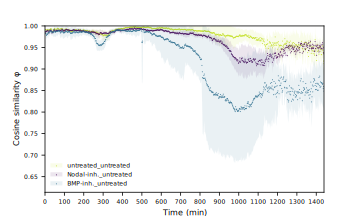

In [31]:
tools_plot_compare.plot_similarities_mean_std_multiple(
    plot_means_overview,
    plot_stds_overview,
    plot_names_overview,
    plot_colors_overview,
    adjustment_timepoints=2,
    path_save=f"{dir_dst_plots}/similarities_untreated_BMP_nodal_with_untreated.svg")

display(SVG(filename=f"{dir_dst_plots}/similarities_untreated_BMP_nodal_with_untreated.svg"))

# Plot similarities of all comparisons as individual curves <a class="anchor" id="ninth-bullet"></a>

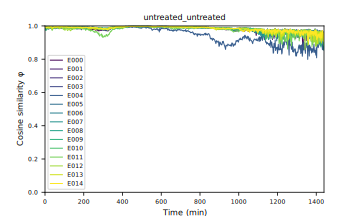

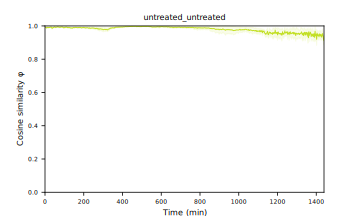

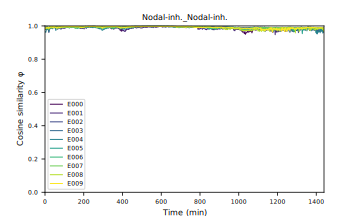

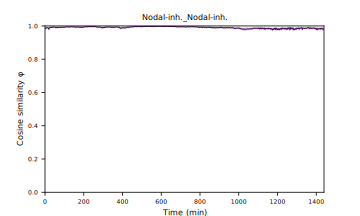

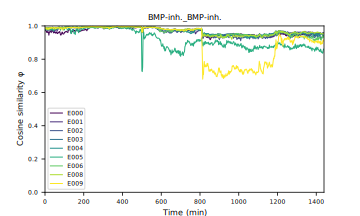

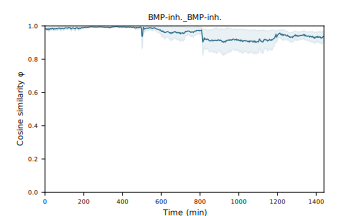

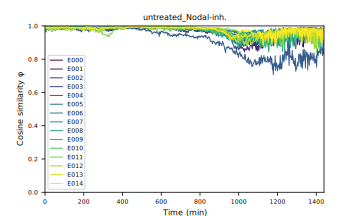

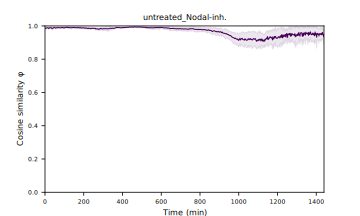

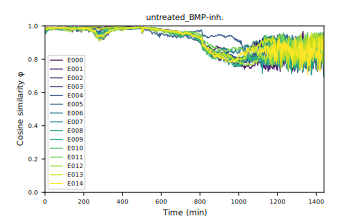

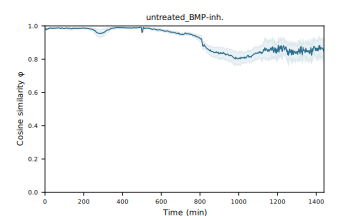

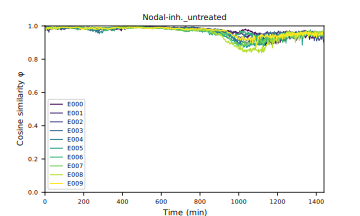

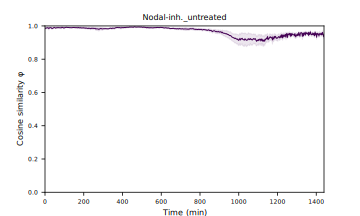

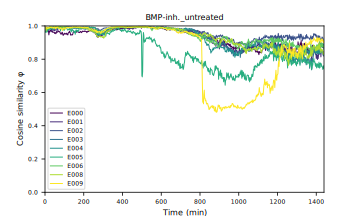

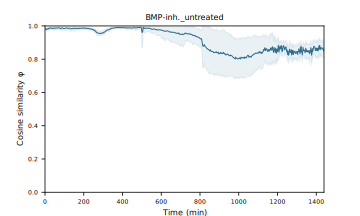

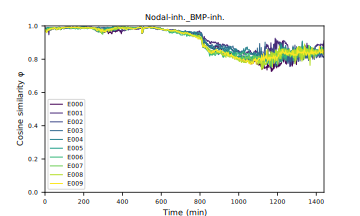

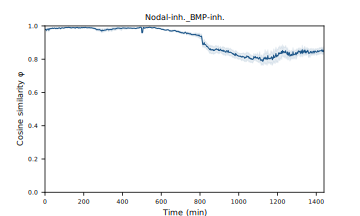

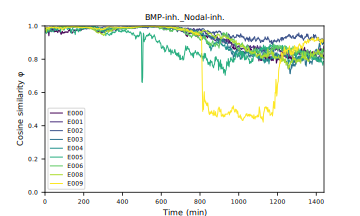

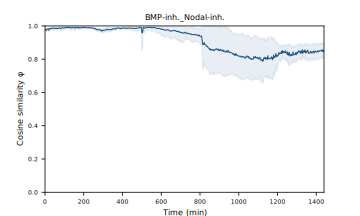

In [32]:
for k_comparison, v_comparison in plot_values_all.items():
    plot_sims = v_comparison[0][0]
    plot_means = v_comparison[0][1]
    plot_stds = v_comparison[0][2]
    plot_color = v_comparison[1]
    
    tools_plot_compare.plot_similarity_trajectories(
        plot_sims,
        title=k_comparison,
        path_save=f"{dir_dst_plots}/similarities_{k_comparison}.svg"
    )
    
    display(SVG(filename=f"{dir_dst_plots}/similarities_{k_comparison}.svg"))
    
    tools_plot_compare.plot_similarity_trajectories_with_errorbound(
        plot_means,
        plot_stds,
        plot_color,
        title=k_comparison,
        path_save=f"{dir_dst_plots}/similarities_mean_std_{k_comparison}.svg"
    )
    
    display(SVG(filename=f"{dir_dst_plots}/similarities_mean_std_{k_comparison}.svg"))
    